### Imports

In [1]:
import pandas as pd
import numpy as np
import time
from datetime import timedelta, datetime
from sklearn.decomposition import LatentDirichletAllocation

### Reading in the data

In [2]:
data = pd.read_csv("amod_df.csv", index_col=0)

In [3]:
data.head()

,eelmine,järgmine,eesti,esimene,viimane,kohalik,suur,1999.,1998.,1997.,...,süvim,energiakullane,voimalustene,asustuslik,aeronavigatsiooniline,sihukne,paarisajamegane,sajamegane,päritav,endis-eesti
aasta,52675,37528,26,3933,24376,7,31,18611,17056,16967,...,0,0,0,0,0,0,0,0,0,0
aeg,102,68,228,126,27393,1359,149,0,0,0,...,0,0,0,0,0,0,0,0,0,0
keel,9,11,29119,87,24,448,89,0,0,0,...,0,0,0,0,0,0,0,0,0,0
osa,195,429,14,3125,920,14,21798,0,0,0,...,0,0,0,0,0,0,0,0,0,0
inimene,9,66,726,800,336,1149,532,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Optimizing LDA

In [4]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

models = {}
perplexities = {}

for n in range(100, 1001, 100):
    model = LatentDirichletAllocation(n_components=n, random_state=0)
    model.fit(data)
    perplexity = model.perplexity(data)
    print(f"Model with {n} topics fitted and perplexity found at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
    models[n] = model
    perplexities[n] = perplexity
            
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

2:20:16.376683
Model with 100 topics fitted and perplexity found at 2:25:32.658582.
Model with 200 topics fitted and perplexity found at 2:31:38.221098.
Model with 300 topics fitted and perplexity found at 2:36:59.589746.
Model with 400 topics fitted and perplexity found at 2:43:49.484042.
Model with 500 topics fitted and perplexity found at 2:50:45.254550.
Model with 600 topics fitted and perplexity found at 2:58:30.325807.
Model with 700 topics fitted and perplexity found at 3:06:47.115174.
Model with 800 topics fitted and perplexity found at 3:18:12.868665.
Model with 900 topics fitted and perplexity found at 3:31:22.035923.
Model with 1000 topics fitted and perplexity found at 3:44:53.857198.
3:44:53.864189
1:24:37.487505


In [5]:
perplexities

{100: 96.59966662144033,
 200: 78.86409815172222,
 300: 71.68968670621116,
 400: 67.97770180966752,
 500: 65.03065983184855,
 600: 63.200791448716764,
 700: 61.377659496058136,
 800: 60.90168528114376,
 900: 59.83497902083938,
 1000: 59.2147704003825}

In [6]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Perplexity')

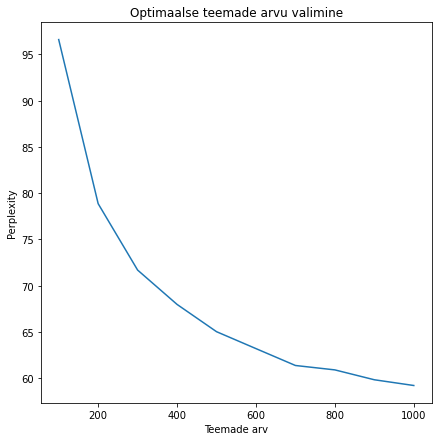

In [7]:
plt.figure(figsize=(7, 7))

plt.plot(list(range(100, 1001, 100)), perplexities.values())

plt.title("Optimaalse teemade arvu valimine")
plt.xlabel("Teemade arv")
plt.ylabel("Perplexity")

In [8]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

for n in [950, 1050, 1100, 1150, 1200]:
    model = LatentDirichletAllocation(n_components=n, random_state=0)
    model.fit(data)
    perplexity = model.perplexity(data)
    print(f"Model with {n} topics fitted and perplexity found at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
    models[n] = model
    perplexities[n] = perplexity
    
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

3:47:48.425666
Model with 950 topics fitted and perplexity found at 4:01:02.033112.
Model with 1050 topics fitted and perplexity found at 4:14:56.452686.
Model with 1100 topics fitted and perplexity found at 4:28:54.819922.
Model with 1150 topics fitted and perplexity found at 4:42:33.271184.
Model with 1200 topics fitted and perplexity found at 4:58:24.053495.
4:58:24.054495
1:10:35.628830


In [9]:
perplexities

{100: 96.59966662144033,
 200: 78.86409815172222,
 300: 71.68968670621116,
 400: 67.97770180966752,
 500: 65.03065983184855,
 600: 63.200791448716764,
 700: 61.377659496058136,
 800: 60.90168528114376,
 900: 59.83497902083938,
 1000: 59.2147704003825,
 950: 59.49648880378315,
 1050: 58.931819115360796,
 1100: 58.503604904113686,
 1150: 58.78513509596531,
 1200: 58.70448590519751}

Text(0, 0.5, 'Perplexity')

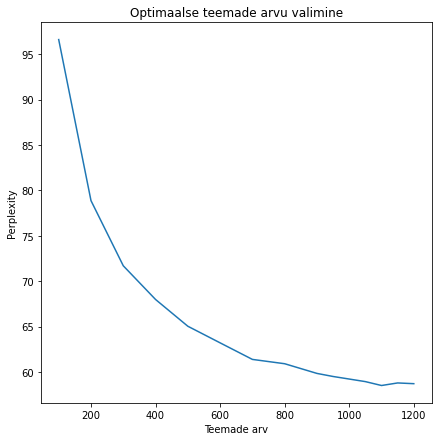

In [10]:
plt.figure(figsize=(7, 7))

keys = [100, 200, 300, 400, 500, 600, 700, 800, 900, 950, 1000, 1050, 1100, 1150, 1200]

plt.plot(keys, [perplexities[key] for key in keys])

plt.title("Optimaalse teemade arvu valimine")
plt.xlabel("Teemade arv")
plt.ylabel("Perplexity")